# Read the TEMP data

In [1]:
import xarray as xr

path='D:/VScode/Paleoclimate_causality/CCSM4_ANN_data/cesmi6gat31rblc200_ANN_210912_998911_cam2_decclimots.nc'

ds=xr.open_dataset(path)
ds

<xarray.Dataset>
Dimensions:          (lev: 26, ilev: 27, time: 788, lat: 48, lon: 96, nbnd: 2)
Coordinates:
  * lev              (lev) float64 3.545 7.389 13.97 23.94 ... 929.6 970.6 992.6
  * ilev             (ilev) float64 2.194 4.895 9.882 ... 956.0 985.1 1e+03
  * time             (time) object 2114-12-16 00:00:00 ... 9984-12-16 00:00:00
  * lat              (lat) float64 -87.16 -83.48 -79.78 ... 79.78 83.48 87.16
  * lon              (lon) float64 0.0 3.75 7.5 11.25 ... 348.8 352.5 356.2
Dimensions without coordinates: nbnd
Data variables: (12/142)
    hyam             (lev) float64 ...
    hybm             (lev) float64 ...
    hyai             (ilev) float64 ...
    hybi             (ilev) float64 ...
    P0               float64 ...
    date             (time) int32 ...
    ...               ...
    VQ               (time, lev, lat, lon) float32 ...
    VT               (time, lev, lat, lon) float32 ...
    VU               (time, lev, lat, lon) float32 ...
    VV               (time, lev, lat, lon) float32 ...
    Z3               (time, lev, lat, lon) float32 ...
    time_bnds        (time, nbnd) object ...
Attributes: (12/18)
    Conventions:               CF-1.0
    source:                    CAM
    case:                      cesmi6gat31rblc200
    title:                     UNSET
    logname:                   guido
    host:                      c9-13.local
    ...                        ...
    climo_command:             '/home/guido/anaconda3/bin/ncclimo -L 1 -c ces...
    climo_hostname:            c3-16
    climo_version:             4.7.4
    yrs_averaged:              2110-2119
    NCO:                       netCDF Operators version 4.8.0 (Homepage = htt...
    nco_openmp_thread_number:  1

# Extract TEMP

In [2]:
import xarray as xr
import numpy as np

# Extracting the 'TREFHT' variable into a new DataArray
ds = ds['TREFHT']

# Creating a new dataset with just the 'TREFHT' variable
ds = ds.to_dataset()
# Get the length of the current 'time' dimension
num_times = ds.dims['time']

# Create a new time variable starting from 0, increasing in steps of 10
new_time = np.arange(0, num_times * 10, 10)

# Assign this new time variable to the 'time' coordinate of your dataset
ds['time'] = new_time

mean_data = ds['TREFHT'].mean(dim='time')

# Subtract the mean from the data
ds['TREFHT_centered'] = ds['TREFHT'] - mean_data



weight = np.cos(np.deg2rad(ds['lat']))
print('shape of the weight:', weight.shape)

# Set weight to 0 if it is smaller than 0
weight = xr.where(weight < 0, 0, weight)

# Add the weight to the dataset
ds['weight'] = weight

# Multiply 'sat_centered' with the weight
ds['TREFHT_c_w']  = ds['TREFHT_centered'] * weight

# ds.info
ds


shape of the weight: (48,)


<xarray.Dataset>
Dimensions:          (time: 788, lat: 48, lon: 96)
Coordinates:
  * time             (time) int32 0 10 20 30 40 50 ... 7830 7840 7850 7860 7870
  * lat              (lat) float64 -87.16 -83.48 -79.78 ... 79.78 83.48 87.16
  * lon              (lon) float64 0.0 3.75 7.5 11.25 ... 348.8 352.5 356.2
Data variables:
    TREFHT           (time, lat, lon) float32 212.5 212.3 212.0 ... 227.6 227.7
    TREFHT_centered  (time, lat, lon) float32 0.08495 0.09824 ... -0.7201
    weight           (lat) float64 0.04956 0.1136 0.1775 ... 0.1136 0.04956
    TREFHT_c_w       (time, lat, lon) float64 0.00421 0.004869 ... -0.03569

In [3]:
# save the ds
ds.to_netcdf('D:/VScode/Paleoclimate_causality/CCSM4_ANN_data/processed/TEMP.nc')


# Load processed data

In [4]:
# load the ds
import xarray as xr

ds = xr.open_dataset('D:/VScode/Paleoclimate_causality/CCSM4_ANN_data/processed/TEMP.nc')
ds

<xarray.Dataset>
Dimensions:          (time: 788, lat: 48, lon: 96)
Coordinates:
  * time             (time) int32 0 10 20 30 40 50 ... 7830 7840 7850 7860 7870
  * lat              (lat) float64 -87.16 -83.48 -79.78 ... 79.78 83.48 87.16
  * lon              (lon) float64 0.0 3.75 7.5 11.25 ... 348.8 352.5 356.2
Data variables:
    TREFHT           (time, lat, lon) float32 ...
    TREFHT_centered  (time, lat, lon) float32 ...
    weight           (lat) float64 ...
    TREFHT_c_w       (time, lat, lon) float64 ...

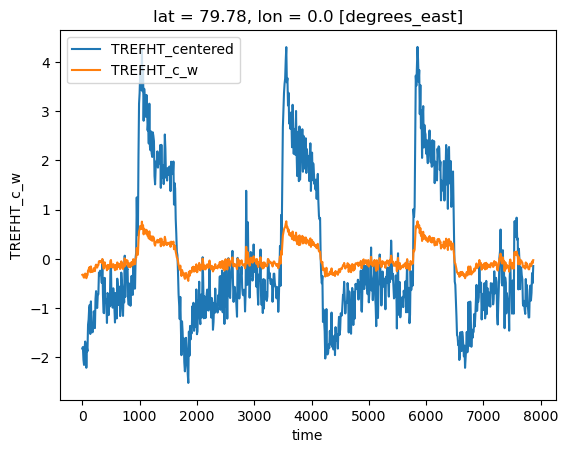

In [8]:
# ds.isel(lat=45, lon=0).TREFHT.plot()
ds.isel(lat=45, lon=0).TREFHT_centered.plot()
ds.isel(lat=45, lon=0).TREFHT_c_w.plot()
# add legend
import matplotlib.pyplot as plt
plt.legend(['TREFHT_centered', 'TREFHT_c_w'])


# Plot data and check

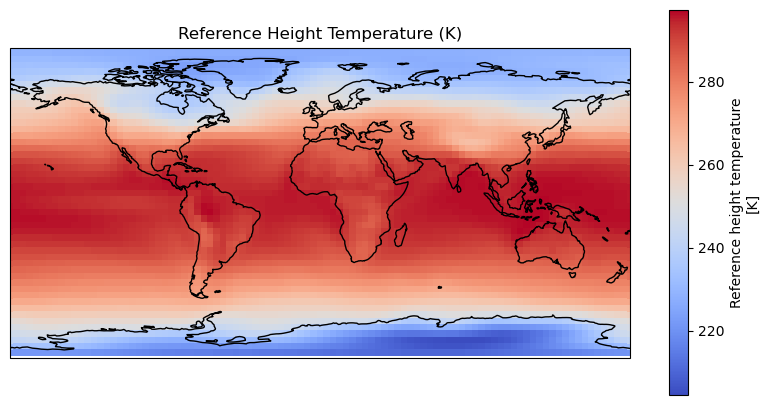

In [9]:
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs



# Plotting the first value of time for TREFHT on a real world map
plt.figure(figsize=(10, 5))
ax = plt.axes(projection=ccrs.PlateCarree())
ds.TREFHT.isel(time=0).plot(ax=ax, x='lon', y='lat', transform=ccrs.PlateCarree(), cmap='coolwarm', add_colorbar=True)
ax.coastlines()
ax.set_global()
plt.title('Reference Height Temperature (K)')
plt.show()


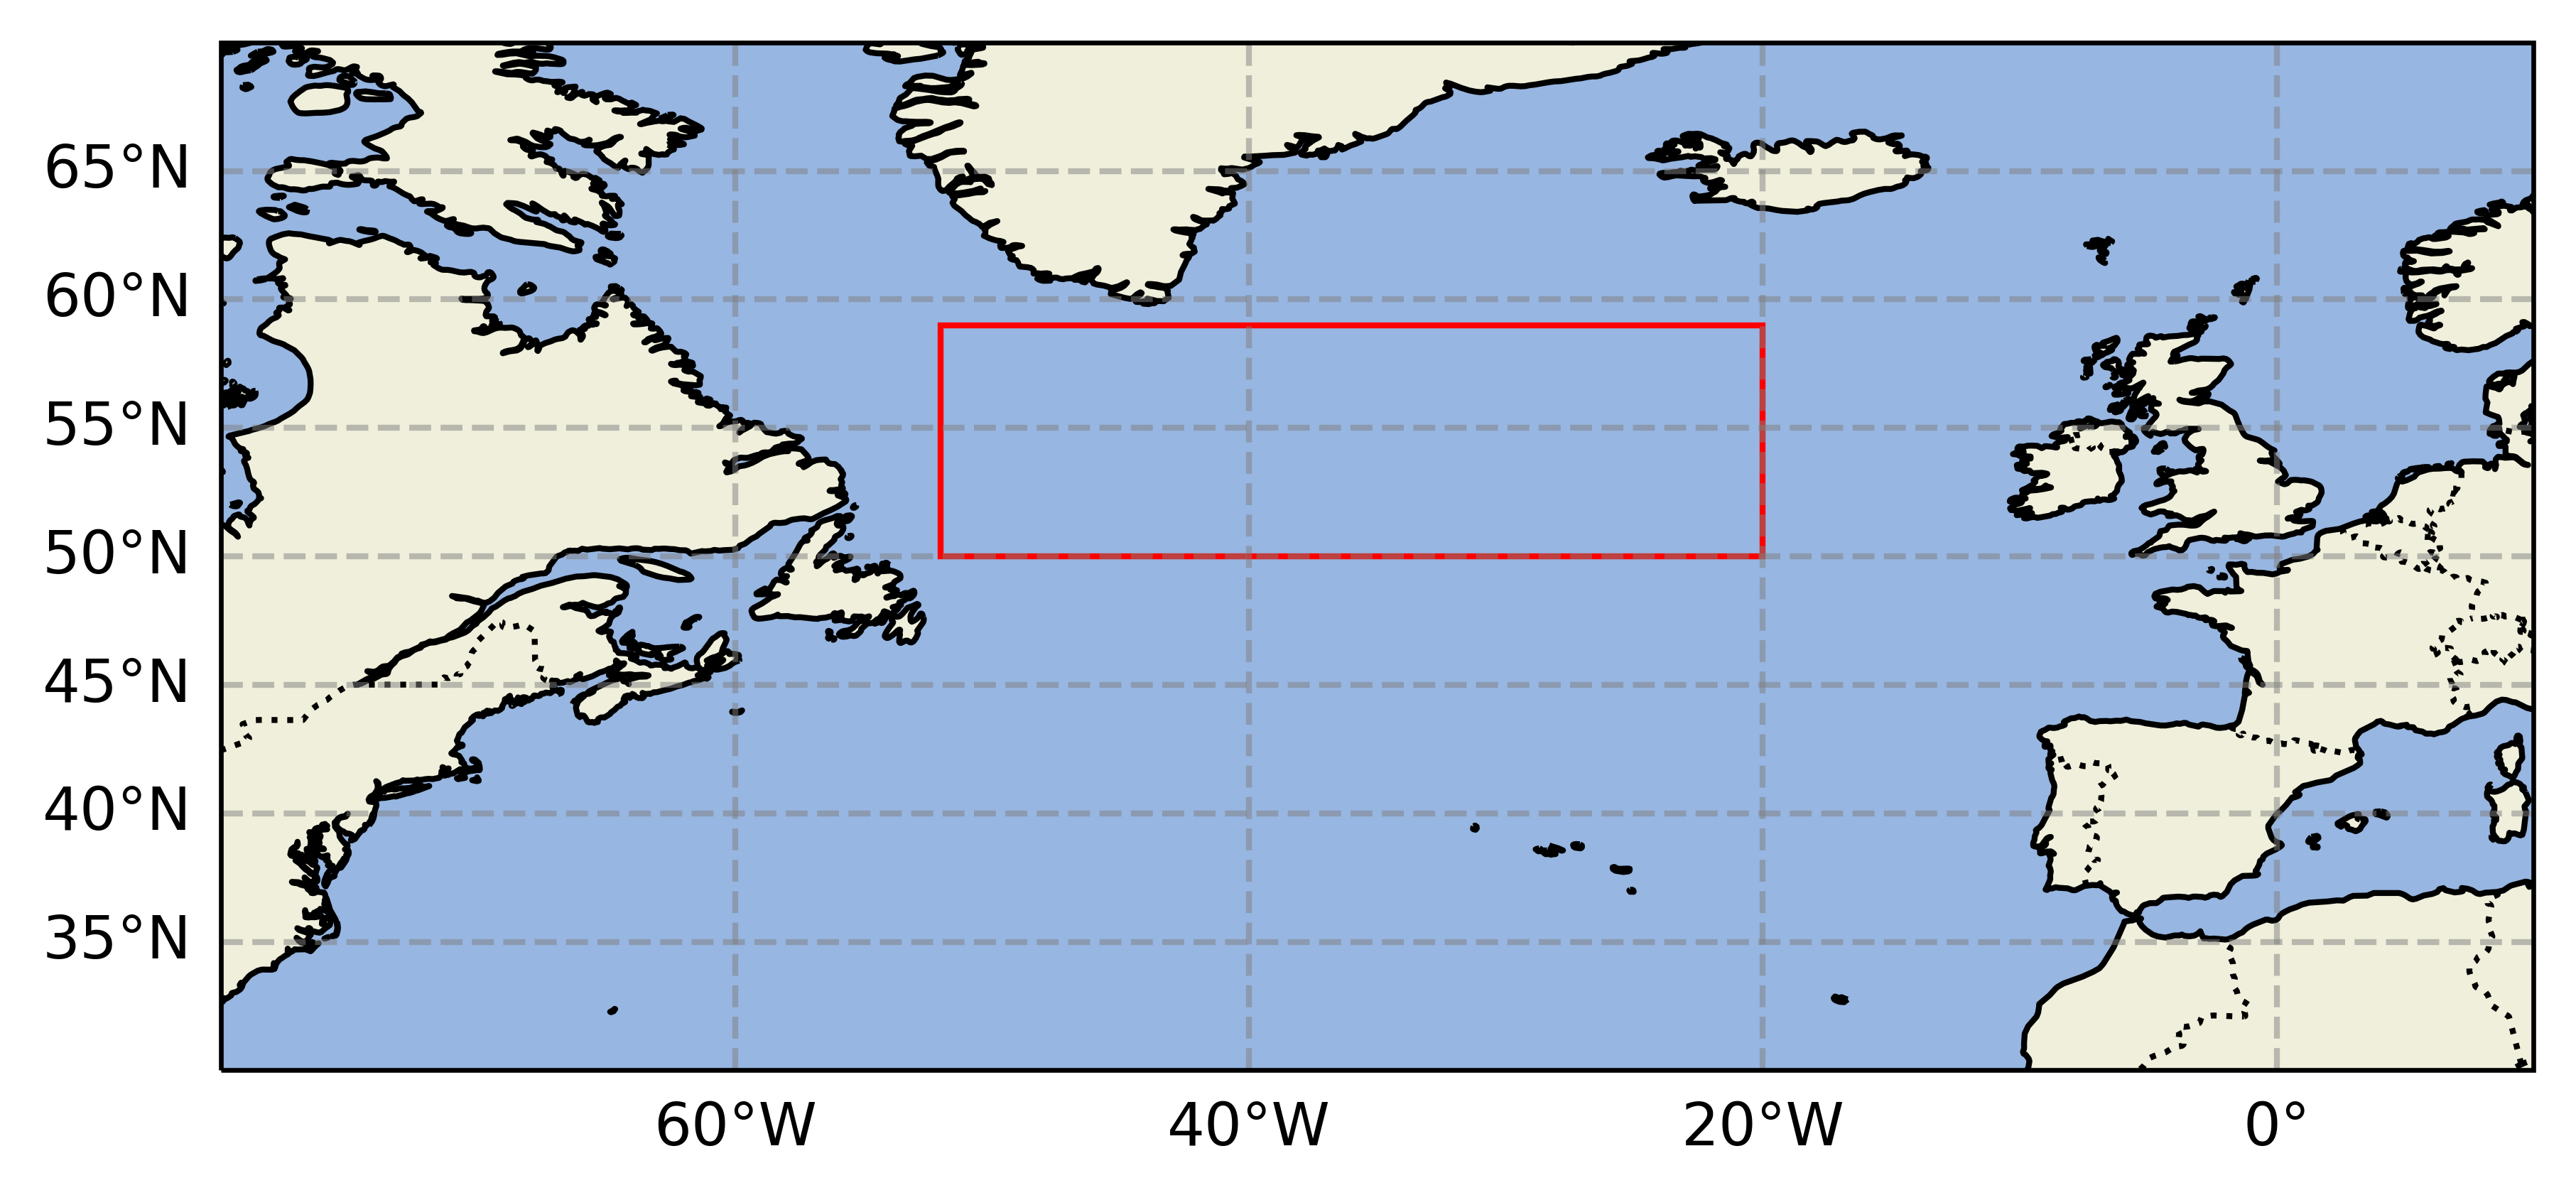

In [11]:
# Re-importing necessary libraries and re-creating the map with the rectangle
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# Create a figure with an axes set with a projection
fig, ax = plt.subplots(figsize=(7, 6), dpi=600, subplot_kw={'projection': ccrs.PlateCarree()})

# Add features to the map
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.set_extent([-80, 10, 30, 70], crs=ccrs.PlateCarree())  # Set the extent to include a wider area for context

# Plot the rectangle between 50 to 59N and 32 to 52W
rectangle = plt.Rectangle((-52, 50), 32, 9, linewidth=1, edgecolor='r', facecolor='none', transform=ccrs.PlateCarree())
ax.add_patch(rectangle)

# 45 to 55N and 20 to 50W

# Adding gridlines and labels
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, linewidth=1, color='gray', alpha=0.5, linestyle='--')
gl.top_labels = False
gl.right_labels = False

# plt.title('Map with Rectangle between 45 to 55N and 20 to 50W')
plt.show()


# Get the data of the selected region

In [12]:
import xarray as xr

# We define the bounding box
lat_bounds = (50, 59)
lon_bounds = (-52, -32)  # Adjusted for dataset longitude coordinates (0 to 360)

# Extracting data within the bounding box
ds_sub = ds.sel(lat=slice(*lat_bounds), lon=slice(360+lon_bounds[0], 360+lon_bounds[1]))

ds_sub.info()
ds_sub

xarray.Dataset {
dimensions:
	time = 788 ;
	lat = 3 ;
	lon = 5 ;

variables:
	int32 time(time) ;
	float64 lat(lat) ;
	float64 lon(lon) ;
		lon:long_name = longitude ;
		lon:units = degrees_east ;
	float32 TREFHT(time, lat, lon) ;
		TREFHT:units = K ;
		TREFHT:long_name = Reference height temperature ;
		TREFHT:cell_methods = time: mean ;
	float32 TREFHT_centered(time, lat, lon) ;
	float64 weight(lat) ;
	float64 TREFHT_c_w(time, lat, lon) ;

// global attributes:
}

<xarray.Dataset>
Dimensions:          (time: 788, lat: 3, lon: 5)
Coordinates:
  * time             (time) int32 0 10 20 30 40 50 ... 7830 7840 7850 7860 7870
  * lat              (lat) float64 50.1 53.81 57.52
  * lon              (lon) float64 311.2 315.0 318.8 322.5 326.2
Data variables:
    TREFHT           (time, lat, lon) float32 ...
    TREFHT_centered  (time, lat, lon) float32 ...
    weight           (lat) float64 ...
    TREFHT_c_w       (time, lat, lon) float64 ...

# Plot and check

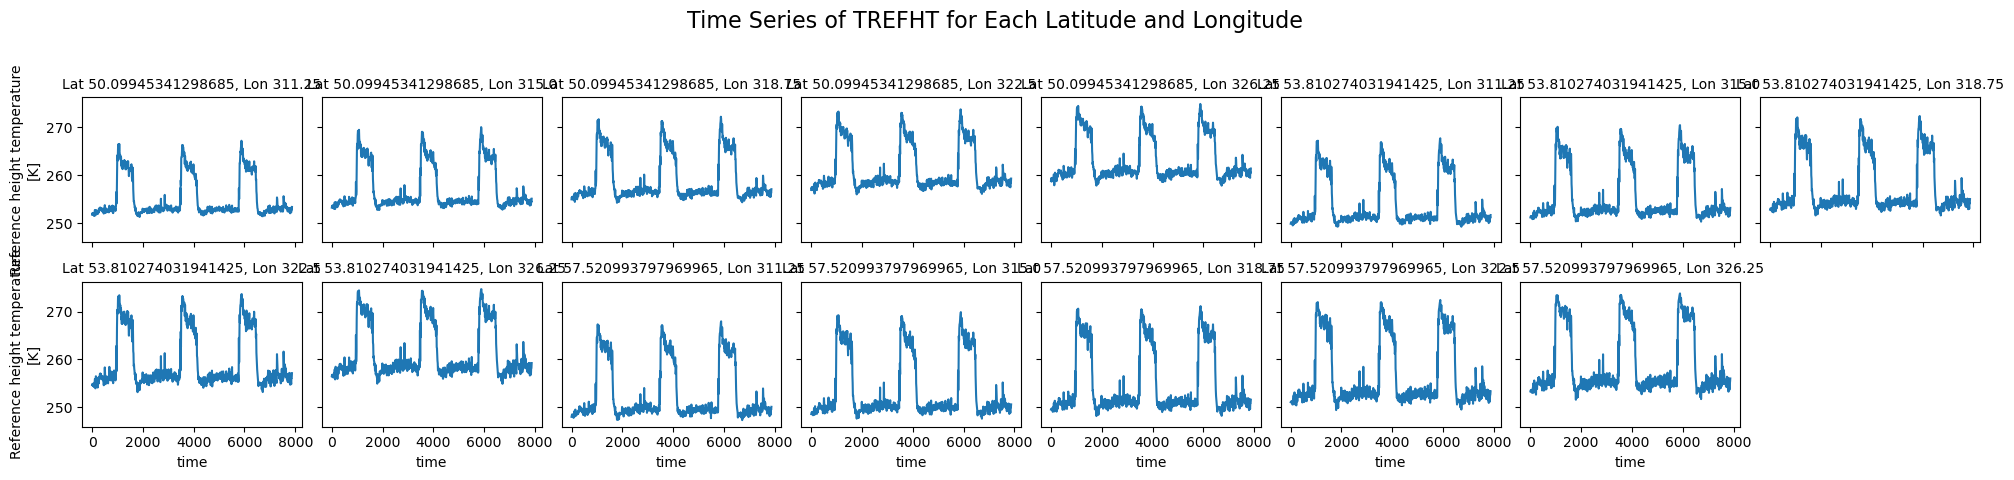

In [13]:
import matplotlib.pyplot as plt
import numpy as np


# Determine the number of rows for plotting in 8 columns
num_lons = len(ds_sub.lon)  # Number of longitude points
num_lats = len(ds_sub.lat)  # Number of latitude points
num_plots = num_lats * num_lons  # Total number of plots
num_rows = np.ceil(num_plots / 8).astype(int)  # Calculate rows needed

fig, axs = plt.subplots(num_rows, 8, figsize=(20, num_rows * 2.5), sharex=True, sharey=True)
fig.suptitle('Time Series of TREFHT for Each Latitude and Longitude', fontsize=16)

# Flatten the axes array for easy access
axs = axs.flatten()

# Iterate over each latitude and longitude to plot
for i, lat in enumerate(ds_sub.lat.values):
    for j, lon in enumerate(ds_sub.lon.values):
        index = i * num_lons + j  # Calculate subplot index
        ax = axs[index]
        ds_sub.sel(lat=lat, lon=lon)['TREFHT'].plot(ax=ax)
        ax.set_title(f'Lat {lat}, Lon {lon}', fontsize=10)  # Correct way to set title
        

# turn off x and y labels for all but the bottom row and leftmost column
for ax in axs:
    ax.label_outer()
    




# Hide any extra subplots that aren't used
for k in range(num_plots, len(axs)):
    axs[k].set_visible(False)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


# Creat the bootstrap mean

In [17]:
import xarray as xr
import numpy as np



def bootstrap_spatial_mean_time_series(ds, n_bootstraps=1000):
    """
    Perform spatial bootstrap resampling to calculate mean time series.

    Args:
        ds: xarray.Dataset containing the weighted 'TREFHT' variable.
        n_bootstraps: Number of bootstrap samples to generate.

    Returns:
        An xarray.DataArray containing the mean time series for each bootstrap sample.
    """
    n_lats = ds.dims['lat']
    n_lons = ds.dims['lon']
    bootstrap_means = np.zeros((n_bootstraps, ds.dims['time']))

    for i in range(n_bootstraps):
        # Randomly sample lat and lon indices with replacement
        sampled_lat_indices = np.random.choice(n_lats, n_lats, replace=True)
        sampled_lon_indices = np.random.choice(n_lons, n_lons, replace=True)
        # Generate a bootstrap sample by selecting from the original dataset
        bootstrap_sample = ds.isel(lat=sampled_lat_indices, lon=sampled_lon_indices)
        # Calculate the mean time series of this bootstrap sample across all latitudes and longitudes
        mean_time_series = bootstrap_sample.mean(dim=['lat', 'lon'])
        bootstrap_means[i, :] = mean_time_series['TREFHT_c_w']

    # Convert the results to an xarray DataArray for convenience
    bootstrap_means_da = xr.DataArray(bootstrap_means, dims=['bootstrap', 'time'],
                                      coords={'bootstrap': range(n_bootstraps), 'time': ds['time']})
    
    return bootstrap_means_da




In [18]:
# Example usage
n_bootstraps = 1000  # Number of bootstrap samples to generate
TEMP_bootstrap_means = bootstrap_spatial_mean_time_series(ds_sub, n_bootstraps)
TEMP_bootstrap_means.values


array([[-2.5229844 , -2.2194062 , -2.38661607, ..., -1.51389165,
        -1.66029057, -1.12826186],
       [-2.48480588, -2.25872048, -2.38049106, ..., -1.57512202,
        -1.7139339 , -1.22737511],
       [-2.66492093, -2.42895443, -2.55111702, ..., -1.73233199,
        -1.80850913, -1.29693385],
       ...,
       [-2.72697943, -2.52672748, -2.60307773, ..., -1.78519356,
        -1.8226171 , -1.30572666],
       [-2.63773004, -2.44201339, -2.55077807, ..., -1.75010621,
        -1.83702935, -1.30366002],
       [-2.4128145 , -2.23964476, -2.28033393, ..., -1.53677989,
        -1.70278331, -1.27363562]])

In [19]:
# save the bootstrap_means_da
TEMP_bootstrap_means.to_netcdf('D:/VScode/Paleoclimate_causality/CCSM4_ANN_data/processed/TEMP_bootstrap_means.nc')

In [1]:
# read the bootstrap_means_da
import xarray as xr

TEMP_bootstrap_means = xr.open_dataarray('D:/VScode/Paleoclimate_causality/CCSM4_ANN_data/processed/TEMP_bootstrap_means.nc')

In [2]:
TEMP_bootstrap_means.values.shape

(1000, 788)

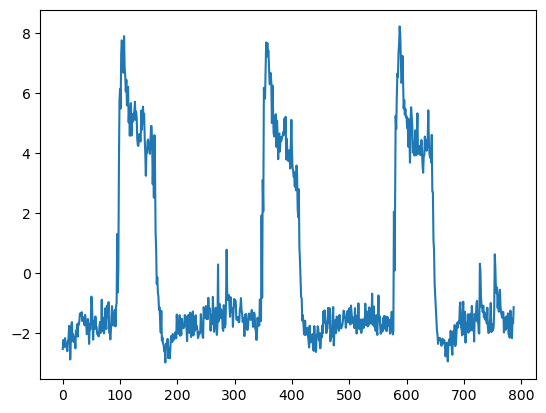

In [4]:
import matplotlib.pyplot as plt

plt.plot(TEMP_bootstrap_means.values[0, :])

# Plot the std

# Crop the DO events

In [8]:
import matplotlib.pyplot as plt

def crop_warming(data, transitions, left_win, right_win, plot=False):
    """
    Crop the data around given transition points and optionally plot the cropped sections.
    
    Parameters:
    - data: The dataset from which to crop sections.
    - transitions: A list of indices representing abrupt warming transitions.
    - left_win: The number of points to include before the transition.
    - right_win: The number of points to include after the transition.
    - plot: A boolean flag to enable/disable plotting of the cropped sections.
    
    Returns:
    - cropped_sections: A list of cropped sections from the dataset.
    """
    cropped_sections = []
    if plot:
        fig, axes = plt.subplots(nrows=len(transitions), figsize=(4, 2 * len(transitions)))
        if len(transitions) == 1:  # Ensure axes is always iterable
            axes = [axes]
    for i, transition in enumerate(transitions):
        start_idx = max(0, transition - left_win)
        end_idx = min(len(data), transition + right_win)
        cropped_section = data[start_idx:end_idx]
        cropped_sections.append(cropped_section)
        if plot:
            axes[i].plot(cropped_section)
            axes[i].set_title(f'Transition at {transition}')
            axes[i].axvline(x=left_win, color='r', linestyle='--', label='Transition Point')
            axes[i].legend()
    if plot:
        plt.tight_layout()
        plt.show()
    
    return cropped_sections



# Load the DO warming transitions

In [6]:
# read D:\VScode\Paleoclimate_causality\warming_ana_data\TEMP_warming_trans_200.npy
import numpy as np
transitions = np.load('D:/VScode/Paleoclimate_causality/warming_ana_data/TEMP_warming_trans_200.npy')

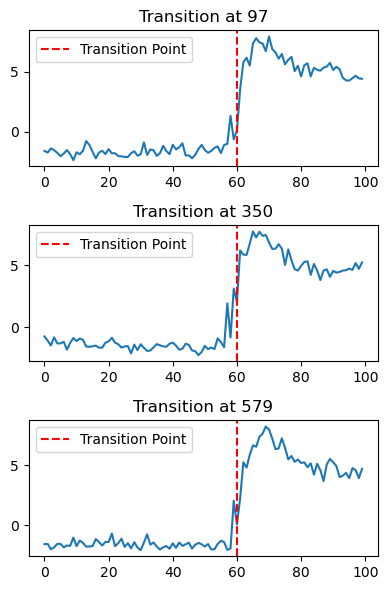

In [ ]:
# Example usage of the function
left_win = 60  # Points to include before the transition
right_win = 40  # Points to include after the transition
# Plotting the first 5 transitions for demonstration
warmings=crop_warming(TEMP_bootstrap_means[0,:], transitions, left_win, right_win, plot=True)

# Crop the bootstrap means

In [19]:
import numpy as np
import xarray as xr


# define the random seed
np.random.seed(0)  # Set random seed for reproducibility

# Generate random_key
random_key = np.random.randint(0, 3, size=1000)  # Generate 1000 random integers between 0 and 2

# Initialize list to hold cropped data
cropped_data_list = []

for row_idx, data_row in enumerate(TEMP_bootstrap_means.values):
    if row_idx < 1000:  # Ensure we only process the first 1000 rows
        transition_idx = transitions[random_key[row_idx]]  # Get the transition index for this row
        # Crop data around the selected transition
        cropped_data = crop_warming(data_row, [transition_idx], left_win=60, right_win=40)
        # Assuming each crop_warming call returns a list of numpy arrays, we take the first (and only) element
        cropped_data_list.append(cropped_data[0])

# Convert list of arrays to a single ndarray
DO_TEMP_bootstrap_cropped = np.array(cropped_data_list)

# print random_key
print(random_key)

[0 1 0 1 1 2 0 2 0 0 0 2 1 2 2 0 1 1 1 1 0 1 0 0 1 2 0 2 0 1 1 2 0 1 1 1 0
 2 0 2 2 0 2 0 0 0 1 1 2 0 0 1 0 1 2 2 0 1 1 1 1 2 2 2 0 2 1 0 1 2 0 0 2 0
 0 0 0 0 0 2 0 2 1 1 1 0 1 1 1 0 1 2 0 1 2 0 2 0 1 2 2 1 0 1 1 0 2 2 2 2 1
 2 2 2 2 2 0 1 2 2 1 2 1 0 2 2 0 2 0 0 2 0 2 2 2 0 0 0 1 2 0 1 2 2 2 1 0 0
 0 0 2 2 0 0 0 1 2 0 0 1 0 2 1 1 1 0 0 0 1 1 2 1 0 0 1 2 1 1 1 0 0 0 1 2 1
 1 0 0 1 2 0 2 2 1 1 1 2 0 0 1 0 2 2 0 2 2 2 1 1 0 0 0 2 2 1 1 0 0 2 1 1 2
 0 1 1 1 1 1 2 2 2 0 1 2 1 1 1 1 0 2 2 0 1 1 0 0 0 2 1 2 1 2 0 2 0 1 1 1 0
 0 0 0 0 0 1 0 2 2 1 1 1 2 1 1 0 1 2 1 1 0 0 1 1 2 1 2 2 1 2 2 0 1 1 1 2 1
 1 1 2 0 1 0 1 1 2 0 2 0 2 0 2 0 0 0 0 1 2 0 0 1 2 1 0 0 0 0 0 1 0 2 2 2 0
 0 2 0 2 2 0 1 1 1 0 0 1 0 0 1 2 2 0 2 1 1 2 1 2 2 1 2 0 0 2 1 1 2 2 1 0 2
 0 2 0 2 1 2 1 0 1 1 2 2 0 1 0 0 0 2 0 1 0 2 1 0 1 2 0 0 0 2 1 0 0 0 0 1 2
 2 1 0 1 1 1 1 1 1 2 2 1 1 1 2 0 0 0 1 0 1 0 2 2 1 0 0 0 0 0 2 1 0 2 0 2 1
 0 0 2 1 2 2 1 0 0 2 1 1 0 0 2 0 1 2 2 1 0 0 1 0 0 2 0 0 1 1 1 1 1 1 2 0 2
 0 1 0 2 0 0 1 2 1 1 1 0 

In [20]:
# save the DO_bootstrap_cropped and random_key in D:\VScode\Paleoclimate_causality\warming_ana_data
np.save('D:/VScode/Paleoclimate_causality/warming_ana_data/DO_TEMP_bootstrap_cropped.npy', DO_TEMP_bootstrap_cropped)
np.save('D:/VScode/Paleoclimate_causality/warming_ana_data/random_key.npy', random_key)

In [25]:
# Read the DO_bootstrap_cropped and random_key
DO_TEMP_bootstrap_cropped = np.load('D:/VScode/Paleoclimate_causality/warming_ana_data/DO_TEMP_bootstrap_cropped.npy')
random_key = np.load('D:/VScode/Paleoclimate_causality/warming_ana_data/random_key.npy')

In [21]:
DO_TEMP_bootstrap_cropped.shape

(1000, 100)

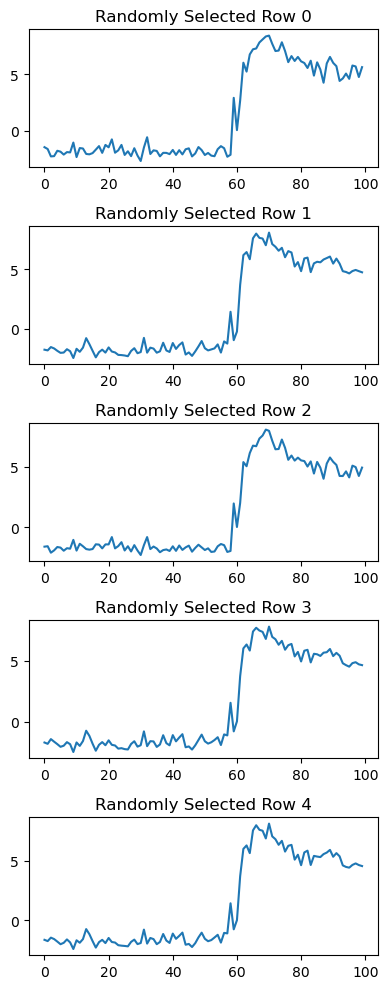

In [22]:
# Number of samples you want to inspect
num_samples = 5

# Generate random indices without replacement
random_indices = np.random.choice(DO_TEMP_bootstrap_cropped.shape[0], num_samples, replace=False)

# Use the indices to select the rows
random_rows = DO_TEMP_bootstrap_cropped[random_indices]



# If you want to visually inspect the data through plots:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=num_samples, figsize=(4, 2*num_samples))

for i, row in enumerate(random_rows):
    if num_samples == 1:
        ax = axes
    else:
        ax = axes[i]
    ax.plot(row)
    ax.set_title(f"Randomly Selected Row {i}")

plt.tight_layout()
plt.show()


#   Crop the AMOC

In [24]:
import numpy as np
# read the AMOC data (called '200.npy') from the /data/CCSM4/AMOC/ directory
AMOC = np.load('D:/VScode/Paleoclimate_causality/data/CCSM4/AMOC/200.npy')
AMOC.shape

(788,)

In [26]:

# Initialize list to hold cropped AMOC data
cropped_AMOC_list = []

# Loop through each element in random_key to get the corresponding transition index
for key in random_key:
    transition_idx = transitions[key]  # Get the transition index for this key
    # Crop AMOC data around the selected transition
    cropped_AMOC = crop_warming(AMOC, [transition_idx], left_win=60, right_win=40)
    # Assuming each crop_warming call returns a list of numpy arrays, we take the first (and only) element
    cropped_AMOC_list.append(cropped_AMOC[0])


AMOC_cropped = np.array(cropped_AMOC_list)
AMOC_cropped.shape




(1000, 100)

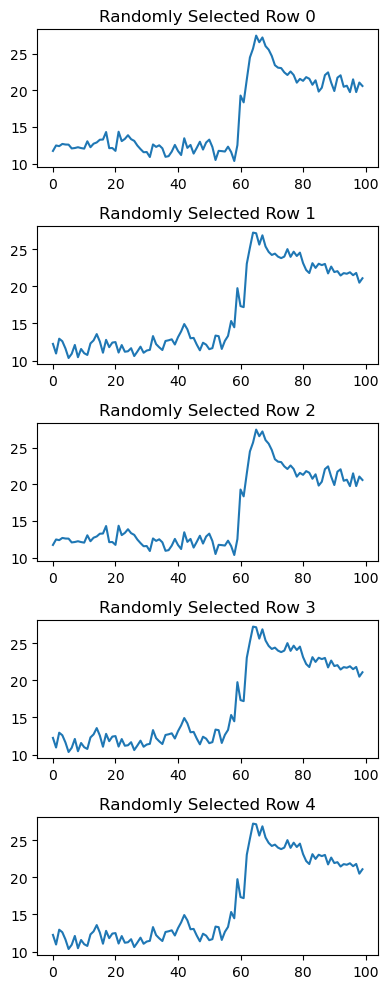

In [29]:
# Number of samples you want to inspect
num_samples = 5

# Generate random indices without replacement
random_indices = np.random.choice(AMOC_cropped.shape[0], num_samples, replace=False)

# Use the indices to select the rows
random_rows = AMOC_cropped[random_indices]



# If you want to visually inspect the data through plots:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=num_samples, figsize=(4, 2*num_samples))

for i, row in enumerate(random_rows):
    if num_samples == 1:
        ax = axes
    else:
        ax = axes[i]
    ax.plot(row)
    ax.set_title(f"Randomly Selected Row {i}")

plt.tight_layout()
plt.show()


In [27]:
# save the AMOC_cropped
np.save('D:/VScode/Paleoclimate_causality/warming_ana_data/AMOC_cropped.npy', AMOC_cropped)

In [28]:
# read the AMOC_cropped
AMOC_cropped = np.load('D:/VScode/Paleoclimate_causality/warming_ana_data/AMOC_cropped.npy')

# Test the GC

In [34]:
import numpy as np
import pandas as pd
from toolbox import GC_functions as GC
import importlib
importlib.reload(GC)

# Assuming DO_bootstrap_cropped and DO_AMOC_cropped are your datasets
iterations = DO_TEMP_bootstrap_cropped.shape[0]  # Number of iterations is the number of rows in DO_AMOC_cropped
causal_results_array = np.zeros((iterations, 2))

for iteration in range(iterations):
    # Prepare your DataFrame from DO_bootstrap_cropped and DO_AMOC_cropped for this iteration
    df_gc = pd.DataFrame({
        'A': DO_TEMP_bootstrap_cropped[iteration],
        'B': AMOC_cropped[iteration]
    })
    
    # Normalization, stationarity checks, etc., go here
    # Similar to your example, but specific to your data and requirements

    # Assuming stationarity has been handled and data is ready
    gc_results = GC.gc4vars(df_gc, max_lags=19, print_results=False)
    causal_AB = gc_results[0]['XY']
    causal_BA = gc_results[0]['YX']
    
    # Store the boolean results directly
    causal_results_array[iteration, 0] = causal_AB  # Column 0 for AB
    causal_results_array[iteration, 1] = causal_BA  # Column 1 for BA



d:\Users\User\anaconda3\envs\pz_venv_causal\lib\site-packages\statsmodels\tsa\stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
d:\Users\User\anaconda3\envs\pz_venv_causal\lib\site-packages\statsmodels\tsa\stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
d:\Users\User\anaconda3\envs\pz_venv_causal\lib\site-packages\statsmodels\tsa\stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
d:\Users\User\anaconda3\envs\pz_venv_causal\lib\site-packages\statsmodels\tsa\stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
d:\Users\User\anaconda3\envs\pz_venv_causal\lib\site-packages\statsmodels\tsa\stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
d:\Users\User\anaconda3\envs\pz_venv_cau

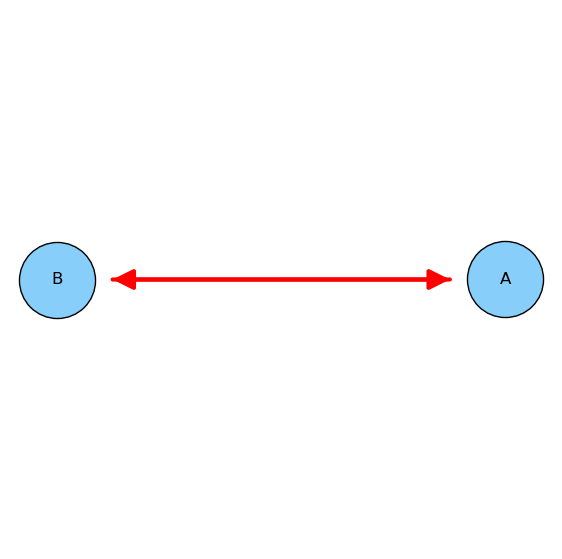

In [42]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np


# find the percentage of values in causal_results_array[:, 0] that is 1
# Aggregate results based on your criteria
perc_AB = np.mean(causal_results_array[:, 0] ==1)
perc_BA = np.mean(causal_results_array[:, 1] ==1)

# Create a directed graph
G = nx.DiGraph()

# Add nodes (unique variables)
variables = ['A', 'B']
for var in variables:
    G.add_node(var)

# Determine the type of edges based on causality criteria
edges_uni = []
edges_bi = []

if perc_AB > 0.95 and perc_BA < 0.95:
    # Unidirectional from A to B
    edges_uni.append(('A', 'B'))
elif perc_BA > 0.95 and perc_AB < 0.95:
    # Unidirectional from B to A
    edges_uni.append(('B', 'A'))
elif perc_AB > 0.95 and perc_BA > 0.95:
    # Bidirectional
    edges_bi.append(('A', 'B'))
    edges_bi.append(('B', 'A'))

# Add edges to the graph with their styles
for edge in edges_uni:
    G.add_edge(*edge, color='black', strength=1)

for edge in edges_bi:
    G.add_edge(*edge, color='red', strength=1)

# Choose layout
pos = nx.circular_layout(G)

# Draw the graph
plt.figure(figsize=(7, 7), dpi=100)  # Adjust the figure size as needed

# Draw nodes
nx.draw_networkx_nodes(G, pos, node_size=3000, edgecolors='black', node_color='lightskyblue', linewidths=1, alpha=1)

# # Draw edges
# nx.draw_networkx_edges(G, pos, edgelist=edges_uni, edge_color='black', arrows=True, width=2, arrowstyle='-|>', arrowsize=20)
# nx.draw_networkx_edges(G, pos, edgelist=edges_bi, edge_color='red', arrows=True, width=2, arrowstyle='-|>', arrowsize=20)

# Draw the edges
nx.draw_networkx_edges(G, pos, edgelist=edges_uni, edge_color='black', arrows=True, width=3, arrowsize=30,
                    min_source_margin=40, min_target_margin=40)
nx.draw_networkx_edges(G, pos, edgelist=edges_bi, edge_color='red', arrows=True, width=3, arrowsize=30,
                    min_source_margin=40, min_target_margin=40)

# Draw labels
nx.draw_networkx_labels(G, pos, font_size=12)

plt.axis('off')
plt.show()
